# Decision Tree Classifier of **Bank Marketing Dataset**

**Loading Libraries and Dataset :**

In [35]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sns.set_theme(context='notebook', style='whitegrid', palette='muted')

In [37]:
data = pd.read_csv("/content/drive/MyDrive/Project_Datasets/Decision_Tree_Classifier/bank-full.csv", sep=';')

**Understanding the shape of the data :**

In [38]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [40]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [41]:
data.duplicated().sum()

0

**Data Cleaning :**

In [42]:
data = data.rename(columns={'y': 'subscribed'})
data['subscribed'] = data['subscribed'].map({'yes': 'Subscribed', 'no': 'Not Subscribed'})

In [43]:
categorical_cols = ['job', 'marital', 'education', 'contact', 'month','poutcome']
data[categorical_cols] = (data[categorical_cols].apply(lambda x: x.str.title())
.astype('category'))
binary_cols = ['default', 'housing', 'loan']
data[binary_cols] = data[binary_cols] == 'yes'

In [44]:
cols_with_outliers = ['age', 'balance', 'duration', 'campaign']

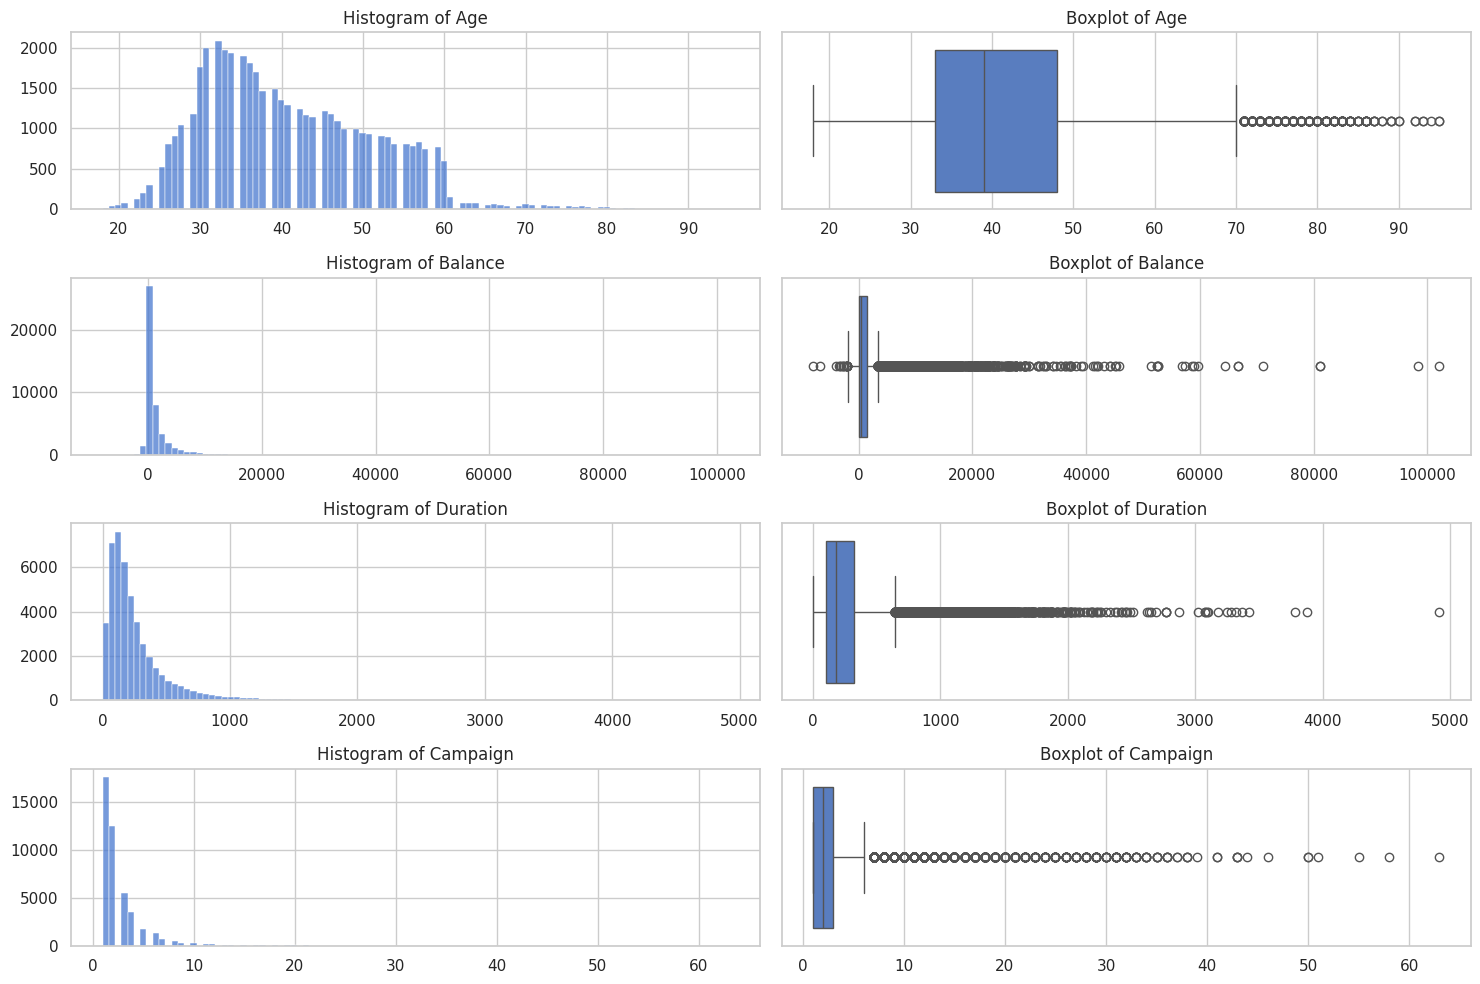

In [45]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
for i, col in enumerate(cols_with_outliers):
  hist_ax, box_ax = axes[i, :]
  sns.histplot(data=data, x=col, bins=100, ax=hist_ax)
  hist_ax.set_title(f'Histogram of {col.title()}')
  hist_ax.set_xlabel('')
  hist_ax.set_ylabel('')
  sns.boxplot(data=data, x=col, ax=box_ax)
  box_ax.set_title(f'Boxplot of {col.title()}')
  box_ax.set_xlabel('')
  box_ax.set_ylabel('')
plt.tight_layout()
plt.show();

In [46]:
def remove_outliers(df, columns):
  df_outliers_removed = data.copy()
  for col in columns:
    Q1 = df_outliers_removed[col].quantile(0.25)
    Q3 = df_outliers_removed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outliers_removed = df_outliers_removed[
    (df_outliers_removed[col] >= lower_bound) &
    (df_outliers_removed[col] <= upper_bound)
    ]
  return df_outliers_removed
data = remove_outliers(data, cols_with_outliers)

In [47]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,Management,Married,Tertiary,False,2143,True,False,Unknown,5,May,261,1,-1,0,Unknown,Not Subscribed
1,44,Technician,Single,Secondary,False,29,True,False,Unknown,5,May,151,1,-1,0,Unknown,Not Subscribed
2,33,Entrepreneur,Married,Secondary,False,2,True,True,Unknown,5,May,76,1,-1,0,Unknown,Not Subscribed
3,47,Blue-Collar,Married,Unknown,False,1506,True,False,Unknown,5,May,92,1,-1,0,Unknown,Not Subscribed
4,33,Unknown,Single,Unknown,False,1,False,False,Unknown,5,May,198,1,-1,0,Unknown,Not Subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,Admin.,Single,Secondary,False,557,False,False,Cellular,17,Nov,224,1,-1,0,Unknown,Subscribed
45203,23,Student,Single,Tertiary,False,113,False,False,Cellular,17,Nov,266,1,-1,0,Unknown,Subscribed
45205,25,Technician,Single,Secondary,False,505,False,True,Cellular,17,Nov,386,2,-1,0,Unknown,Subscribed
45209,57,Blue-Collar,Married,Secondary,False,668,False,False,Telephone,17,Nov,508,4,-1,0,Unknown,Not Subscribed


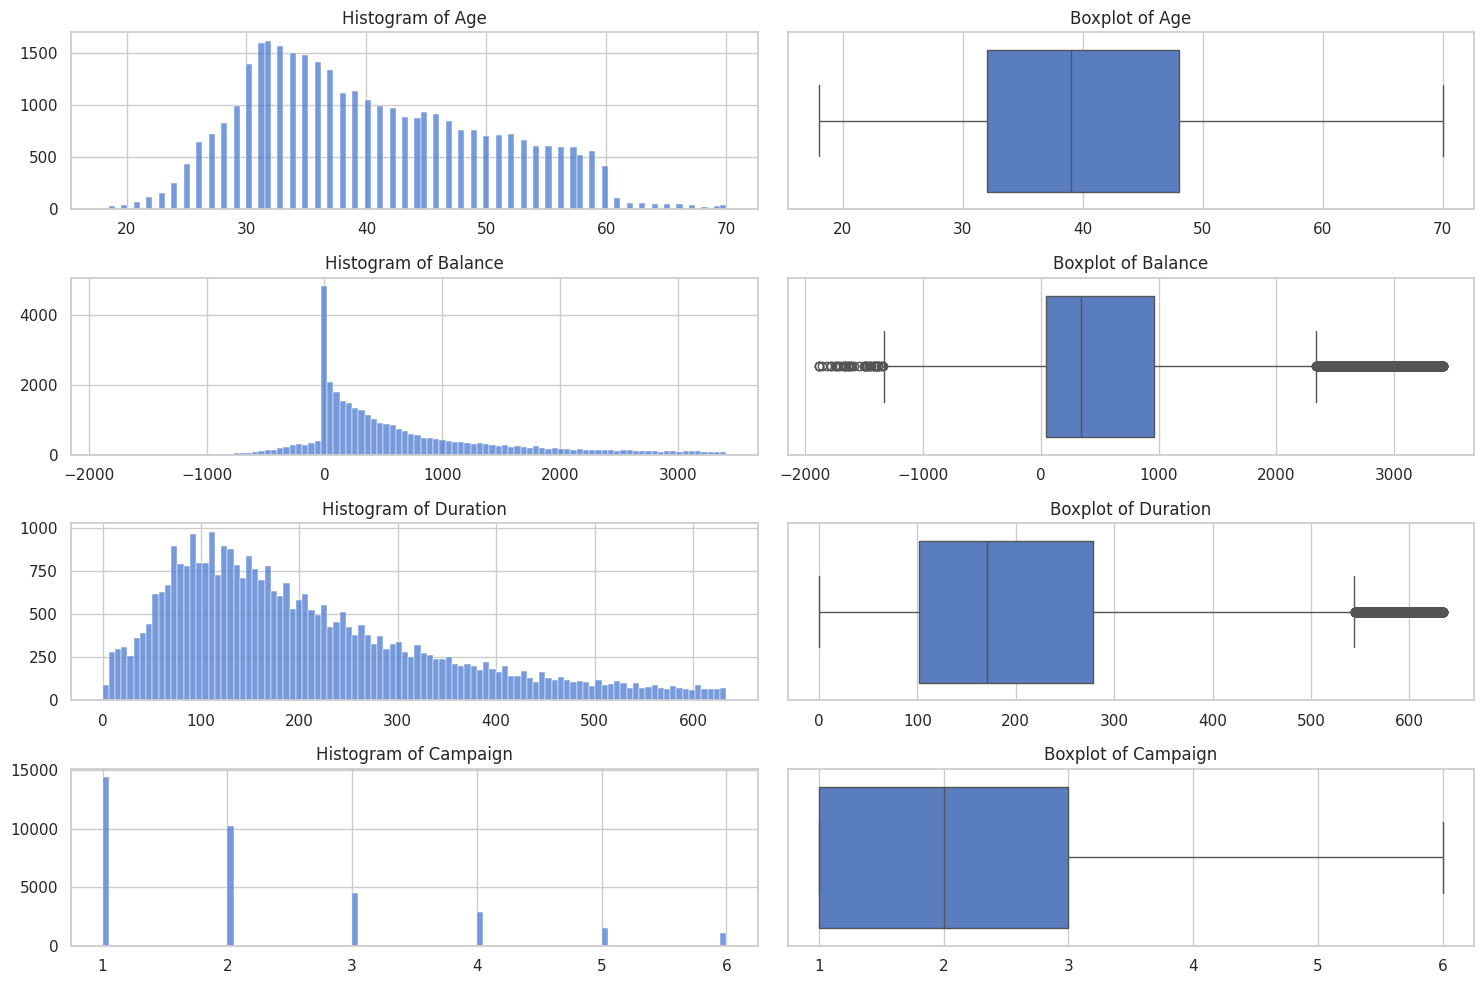

In [48]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
for i, col in enumerate(cols_with_outliers):
  hist_ax, box_ax = axes[i, :]
  sns.histplot(data=data, x=col, bins=100, ax=hist_ax)
  hist_ax.set_title(f'Histogram of {col.title()}')
  hist_ax.set_xlabel('')
  hist_ax.set_ylabel('')
  sns.boxplot(data=data, x=col, ax=box_ax)
  box_ax.set_title(f'Boxplot of {col.title()}')
  box_ax.set_xlabel('')
  box_ax.set_ylabel('')
plt.tight_layout()
plt.show();

**Data Exploration :**

In [49]:
num_cols = data.select_dtypes('number').columns.tolist()
bool_cols = data.select_dtypes(bool).columns.tolist()
cat_cols = data.select_dtypes('category').columns.tolist()

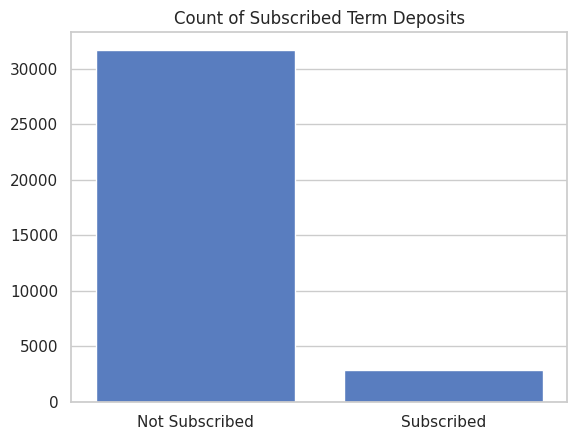

In [50]:
sns.countplot(data=data, x='subscribed');
plt.title('Count of Subscribed Term Deposits')
plt.xlabel('')
plt.ylabel('')
plt.show();

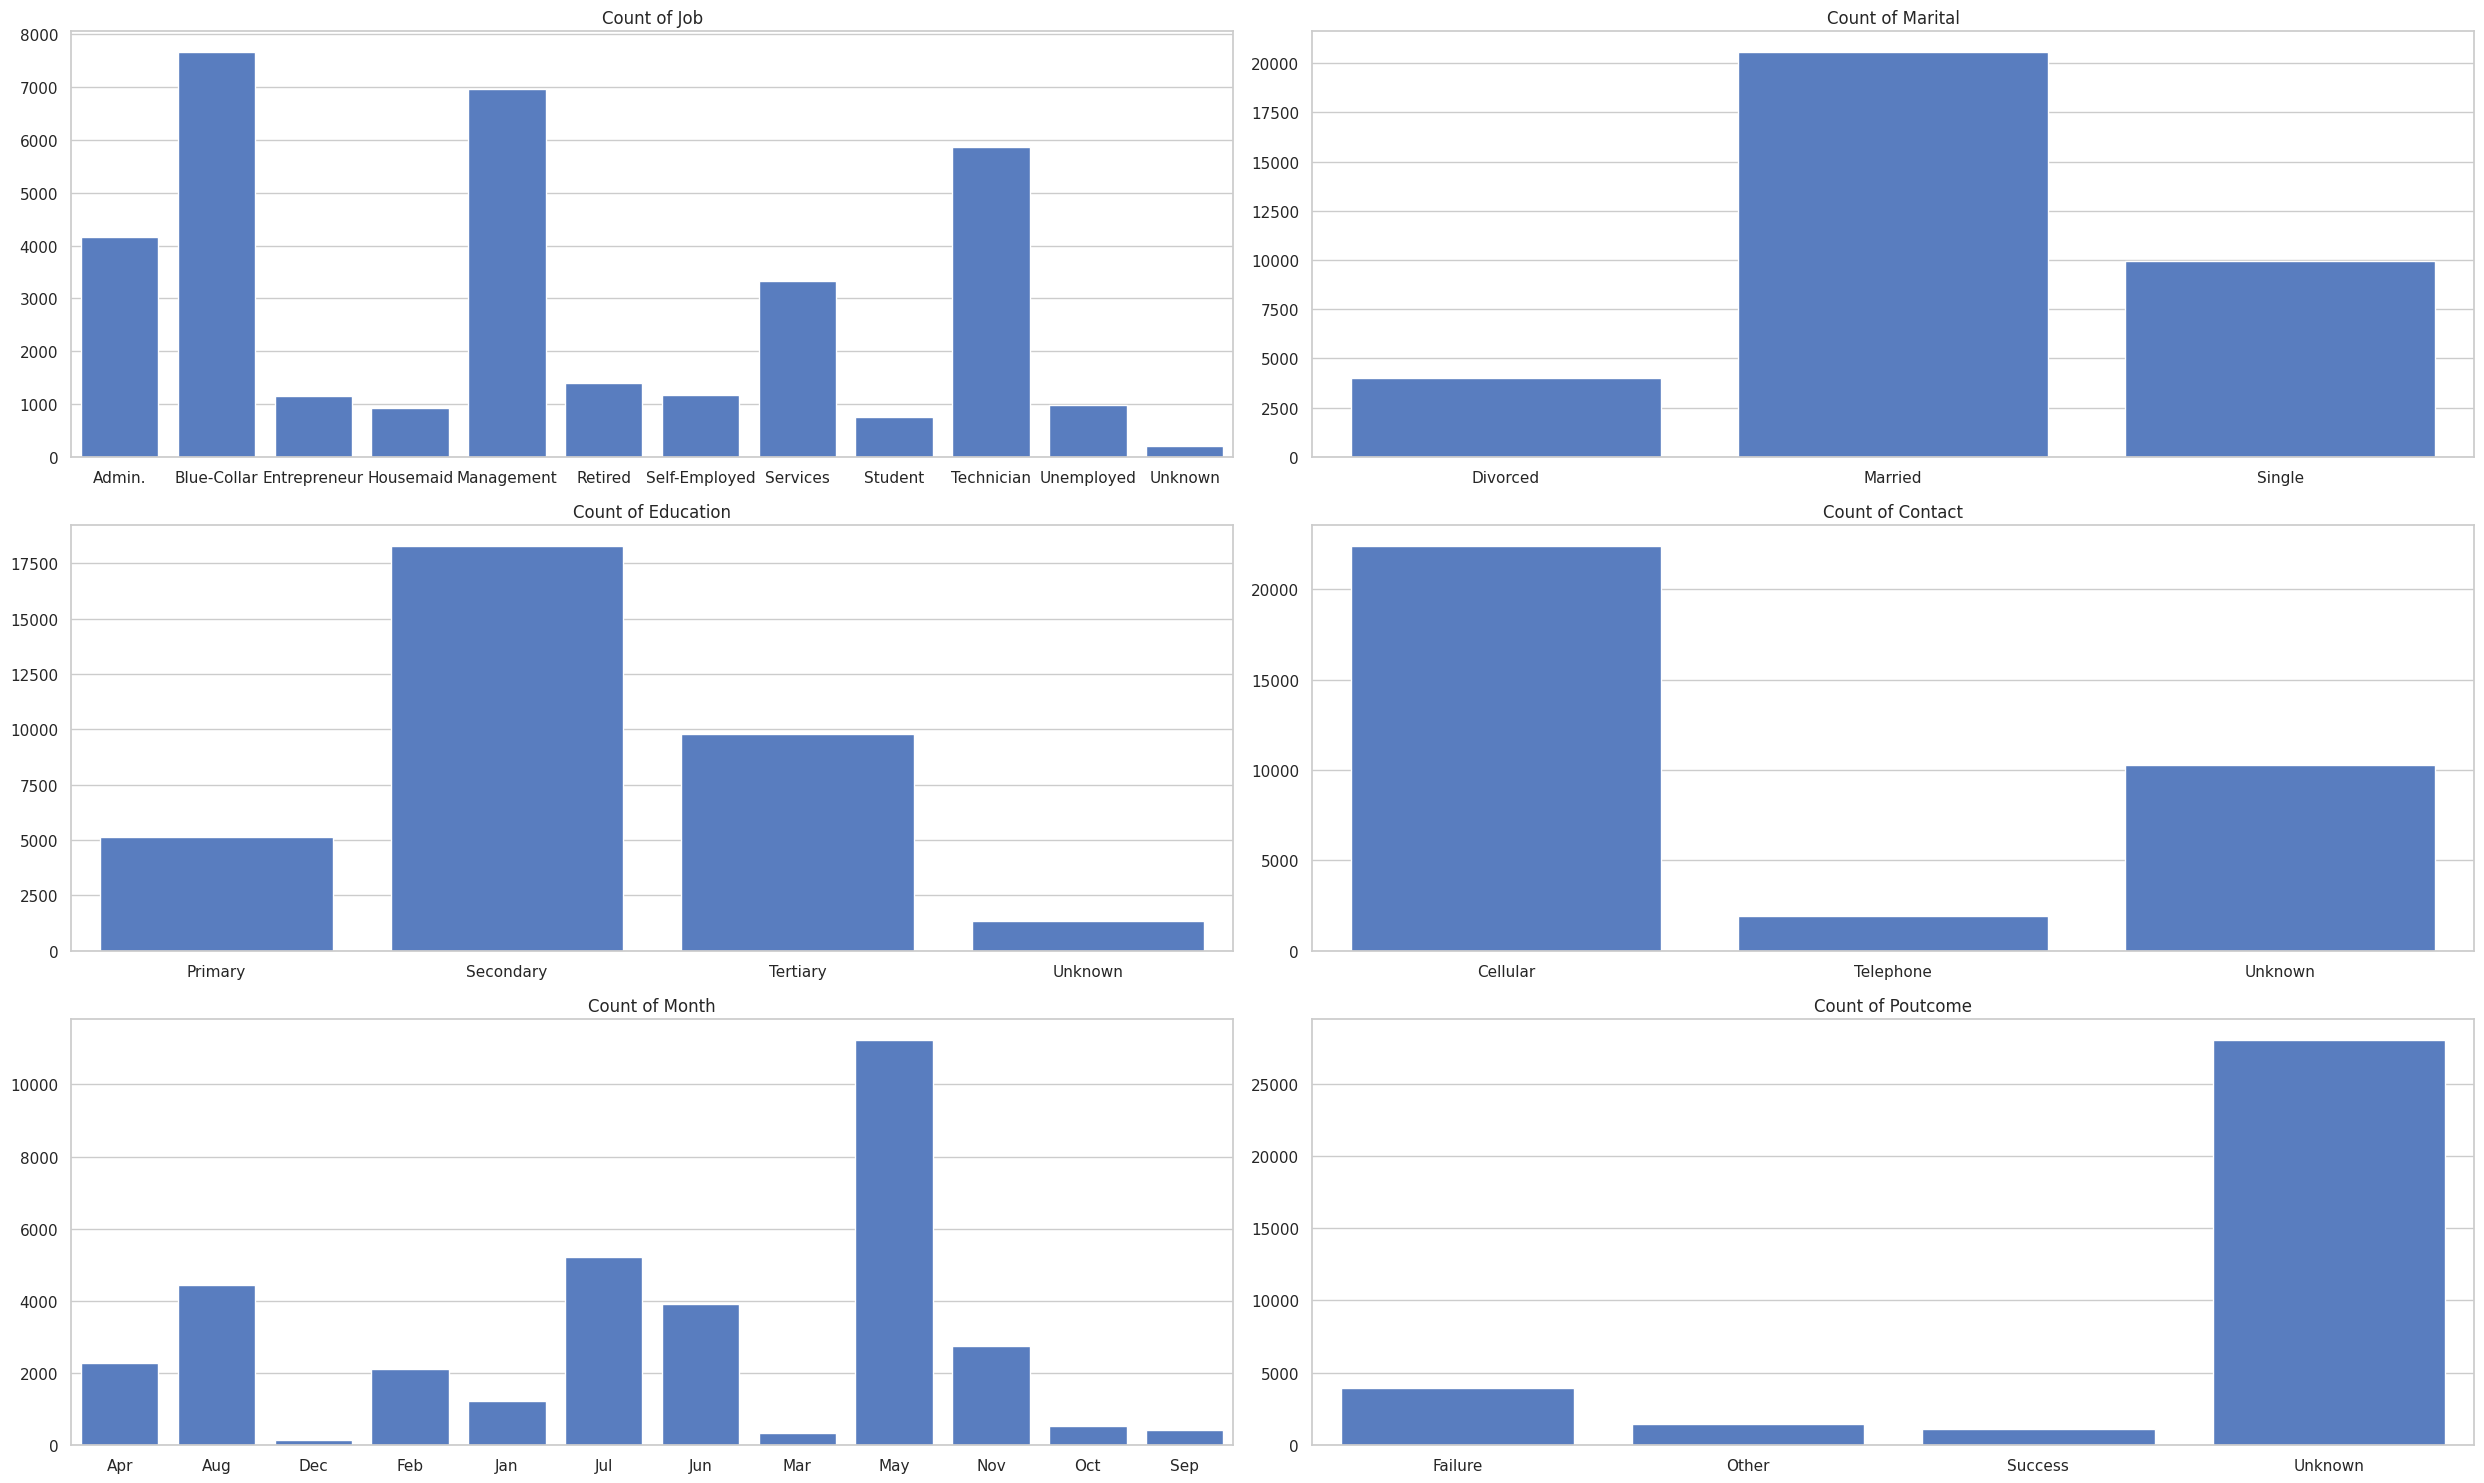

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(25, 15))
for feature, ax in zip(cat_cols, axes.flatten()):
  sns.countplot(data=data, x=feature, ax=ax)
  ax.set_title(f'Count of {feature.title()}')
  ax.set_xlabel('')
  ax.set_ylabel('')
plt.tight_layout()
plt.show();

**Data Preprocessing for Model Training :**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

In [53]:
X = data.drop(columns='subscribed')
y = data['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [54]:
num_vars = data.select_dtypes('number').columns.tolist()
cat_vars = data.select_dtypes('category').columns.tolist()

In [55]:
preprocessing_pipeline = ColumnTransformer([
  ('numerical', StandardScaler(), num_vars),
  ('categorical', OneHotEncoder(), cat_vars),
])
X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

In [56]:
sampler = RandomOverSampler(random_state=42)
X_train, y_train = sampler.fit_resample(X_train, y_train)

**Building Basic Model :**

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [58]:
%%time
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

CPU times: user 2.24 s, sys: 2.3 ms, total: 2.24 s
Wall time: 2.24 s


DecisionTreeClassifier(random_state=42)

In [59]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(f'Classification Report:\n{report}')

Accuracy: 90.16%
Classification Report:
                precision    recall  f1-score   support

Not Subscribed       0.95      0.95      0.95      6343
    Subscribed       0.41      0.41      0.41       570

      accuracy                           0.90      6913
     macro avg       0.68      0.68      0.68      6913
  weighted avg       0.90      0.90      0.90      6913



**Fine Tuning the Model :**

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [61]:
param_grid = {
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
}

In [62]:
scorer = make_scorer(f1_score, pos_label='Subscribed')

In [63]:
base_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=base_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring=scorer,
                           verbose=1,
                           n_jobs=-1)

In [64]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 3.72 s, sys: 182 ms, total: 3.91 s
Wall time: 2min 13s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score, pos_label=Subscribed), verbose=1)

In [65]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f'Best Accuracy: {accuracy:.2%}')
print(f'Best Parameters:\n{best_params}')

Best Accuracy: 90.16%
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [66]:
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Classification Report:
                precision    recall  f1-score   support

Not Subscribed       0.95      0.95      0.95      6343
    Subscribed       0.41      0.41      0.41       570

      accuracy                           0.90      6913
     macro avg       0.68      0.68      0.68      6913
  weighted avg       0.90      0.90      0.90      6913



**Testing the results :**

In [67]:
from sklearn.metrics import confusion_matrix

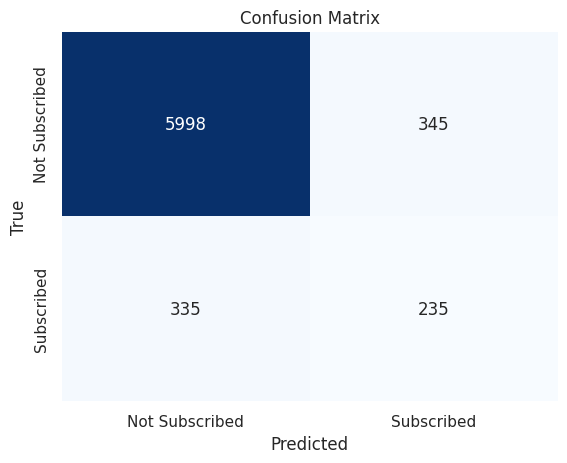

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)
labels = best_model.classes_
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();